## Data Preparation Pipeline (Coughvid + Samples from Coswara)

This notebook increases the size of the training dataset by integrating Coswara audio samples into the existing CoughVid training set. 

Objective: To combine CoughVid and Coswara datasets into a single, enriched training set with balanced binary labels (healthy vs not healthy), while preserving the original CoughVid test set for evaluation.

Note:
- The code is designed to run in Google Colab with helper functions and scripts imported from Google Drive. All helper scripts are stored in the data_preparation folder.
- The output examples shown in this notebook are for illustration only. They use a small sample of files to help you understand what the full pipeline should look like when properly run.

Pipeline Summary:

0. Mount Google Drive
1. Copy Coughvid Training Data & Combine with Samples from Coswara
2. Data Integrity Check

### 0. Mount Google Drive

- This step handles mounting Drive and ensuring access scripts and datasets stored in your Drive.
- Accompanying helper file: step1_get_zip.py

In [ ]:
# Mount Google Drive to access files
# This code is intended to be run in Google Colab
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
# To run this notebook, you need to cd to the folder where the helper files are located.
# You can do this by running the following command:
%cd /content/drive/MyDrive/AML/Dataprep/test_coughvid_plus_coswara_dataprep_for_github/py_util/

/content/drive/.shortcut-targets-by-id/1UBr7xHwiaUCT4Y9U0LH_0qJJfCYxNbgT/AML/Dataprep/test_coughvid_plus_coswara_dataprep_for_github/py_util


In [ ]:
# As backup, to use the helper files, we add its path to the system path
# This is not necessary if you are already in the correct directory.
# You can comment this line out if you are already in the correct directory.
import sys
sys.path.append('/content/drive/MyDrive/AML/Dataprep/test_coughvid_plus_coswara_dataprep_for_github/py_util')

In [ ]:
# Importing the function to check if the drive is mounted, and to mount it if not
from step1_get_zip import mount_drive
mount_drive()

Google Drive already mounted.


Expected Output:
- Google Drive mounted
- Able to access helper files

### 1. Copy Coughvid Training Data & Combine with Samples from Coswara

- This step expands the training data by combining CoughVid and Coswara datasets. The goal is to increase the size and diversity of the training set while preserving the original test set from CoughVid for consistent evaluation.
- Steps performed:
    - Copy all training and test files from the CoughVid dataset into a new combined folder.
    - Sample and copy up to:
        - 200 healthy and 200 not healthy .wav files from Coswara.
        - If there are fewer than 200 available per class, all available files are used.
    - Merge metadata:
        - CoughVid and Coswara label files are combined.
        - A single training CSV and test CSV are generated for the merged dataset.
    - Display label distributions for each component:
        - CoughVid (train/test/full)
        - Coswara (before sampling)
        - Final Combined Dataset (train/test/full)

In [ ]:
from step7_expand_dataset import combine_datasets

# ===== Paths for Original Datasets =====

# CoughVid (Dataset 1)
dataset1_train = "/content/drive/MyDrive/AML/Dataprep/test_coughvid_dataprep_for_github/fortest_coughvid_train"
dataset1_test = "/content/drive/MyDrive/AML/Dataprep/test_coughvid_dataprep_for_github/fortest_coughvid_test"
dataset1_train_csv = "/content/drive/MyDrive/AML/Dataprep/test_coughvid_dataprep_for_github/fortest_train_labels_coughvid.csv"
dataset1_test_csv = "/content/drive/MyDrive/AML/Dataprep/test_coughvid_dataprep_for_github/fortest_test_labels_coughvid.csv"

# Coswara (Dataset 2)
dataset2_train = "/content/drive/MyDrive/AML/Dataprep/test_coswara_dataprep_for_github/fortest_coswara_train"
dataset2_train_csv = "/content/drive/MyDrive/AML/Dataprep/test_coswara_dataprep_for_github/fortest_train_labels_coswara.csv"

# ===== Output Paths for Combined Dataset =====

combined_train = "/content/drive/MyDrive/AML/Dataprep/test_coughvid_plus_coswara_dataprep_for_github/fortest_combined_train"
combined_test = "/content/drive/MyDrive/AML/Dataprep/test_coughvid_plus_coswara_dataprep_for_github/fortest_combined_test"

combined_train_csv = "/content/drive/MyDrive/AML/Dataprep/test_coughvid_plus_coswara_dataprep_for_github/fortest_combined_train_labels.csv"
combined_test_csv = "/content/drive/MyDrive/AML/Dataprep/test_coughvid_plus_coswara_dataprep_for_github/fortest_combined_test_labels.csv"

# ===== Run Expansion Pipeline =====
combine_datasets(
    dataset1_train=dataset1_train,
    dataset1_test=dataset1_test,
    dataset2_train=dataset2_train,
    dataset1_train_csv=dataset1_train_csv,
    dataset1_test_csv=dataset1_test_csv,
    dataset2_train_csv=dataset2_train_csv,
    combined_train=combined_train,
    combined_test=combined_test,
    combined_train_csv=combined_train_csv,
    combined_test_csv=combined_test_csv
)


Expected Output:
- fortest_combined_train/ – contains:
    - All original CoughVid training .wav files
    - All sampled Coswara files (up to 400 total additions)
- fortest_combined_test/ – contains:
    - All CoughVid test .wav files (unchanged)
- fortest_combined_train_labels.csv – merged label CSV for the combined training set
- fortest_combined_test_labels.csv – copied label CSV from the original CoughVid test set
- While the cell does not generate a confirmation message or plots, all results (label distributions, file counts, and audio loading checks) will be verified in the next step using the run_check_pipeline() function from step6_check_dataset.py.

### 2. Data Integrity Check

- This step runs a full validation of the combined dataset created. It ensures the correctness of file-to-label alignment, checks for any missing or unreadable files, and confirms a balanced label distribution across the train and test sets.
- File Count Verification: Confirms the number of .wav files in the combined train and test directories.
- Label Matching:
    - Reads label CSVs for both train and test.
    - Confirms each file in the folders has a corresponding label.
    - Validates health_status values.
- Label Distribution Plotting
    - Displays stratified class balance for both sets.
    - Verifies balance visually (e.g., 50/50 split between 0 = Not Healthy and 1 = Healthy).
- Audio File Read Check:
    - Attempts to load all audio files using librosa.
    - Reports any failures due to corrupt or missing data.
    - Displays a few sample waveform shapes to confirm expected formats.


=== Step 1: Copy Dataset 1 (CoughVid) files ===

=== Step 2: Sample and copy from Dataset 2 (Coswara) ===

Reading CSV: /content/drive/MyDrive/AML/Dataprep/test_coswara_dataprep_for_github/fortest_train_labels_coswara.csv
Available columns: ['filename', 'health_status']
Not enough files for label 1: found 20, needed 200. Using all available.
Copied 20 files for label 1

Reading CSV: /content/drive/MyDrive/AML/Dataprep/test_coswara_dataprep_for_github/fortest_train_labels_coswara.csv
Available columns: ['filename', 'health_status']
Not enough files for label 0: found 20, needed 200. Using all available.
Copied 20 files for label 0

=== Step 3: Merge metadata ===
Saved combined train CSV to: /content/drive/MyDrive/AML/Dataprep/test_coughvid_plus_coswara_dataprep_for_github/fortest_combined_train_labels.csv
Copied test CSV to: /content/drive/MyDrive/AML/Dataprep/test_coughvid_plus_coswara_dataprep_for_github/fortest_combined_test_labels.csv

=== Step 4: Print distributions ===

CoughVid 

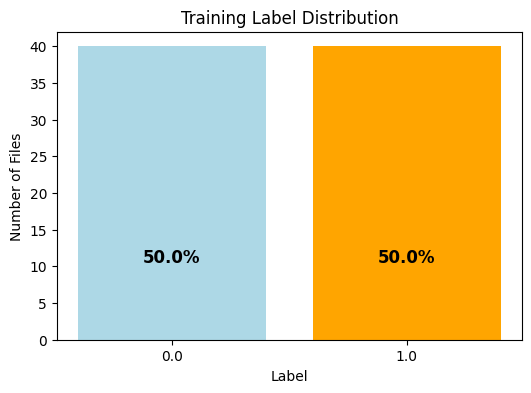

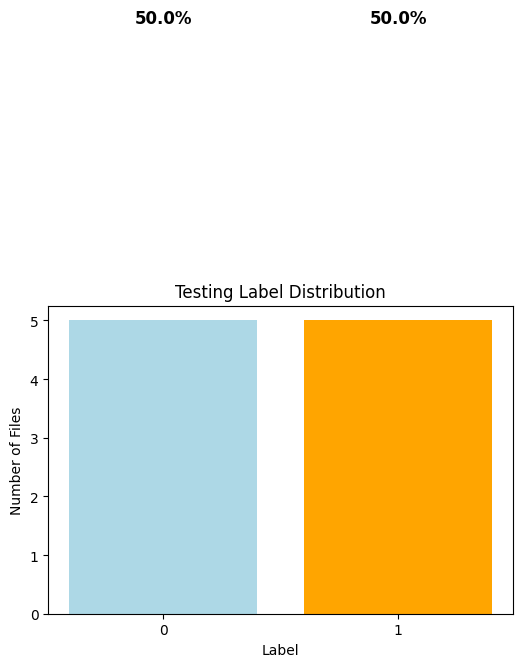

Skipped 0 files due to errors.
Skipped 0 files due to errors.

Training Data: 80 samples
Test Data: 10 samples

Sample training shapes:
d1fd16e4-258e-4b20-9978-d0f6106b1d22.wav: (17920,)
bc048378-1d7f-44ed-a8a8-e2ce7d0a56ae.wav: (31232,)
e8fe6b8b-a7be-404d-95a5-5da7f4efe0e8.wav: (29696,)
2499bd0e-4221-449a-8184-ee15e1c80b35.wav: (9216,)
beb9eff3-e2c7-4f53-981b-0abc09158dec.wav: (96256,)

Sample test shapes:
4a19eff2-8302-4aa6-9164-ae5a9d2d824f.wav: (73216,)
28d173a5-6b04-4c7b-8b29-84e670dc6c35.wav: (39424,)
9cefcba6-bea1-4131-a905-3d28e567344b.wav: (34816,)
5b2342d2-01f8-4ad7-bf13-217601cd3c13.wav: (84480,)
47edb277-7f3c-426d-8e14-a0385f3c1b77.wav: (49152,)


In [ ]:
from step6_check_dataset import run_check_pipeline

# ===== Run Post-Check Pipeline on Combined Output =====
run_check_pipeline(
    train_dir=combined_train,
    test_dir=combined_test,
    train_labels_path=combined_train_csv,
    test_labels_path=combined_test_csv
)

Expected Output:
- File counts printed for both train and test directories
- Label counts for each class
- Bar plots showing class distribution in:
    - Training set
    - Testing set
- Label matching confirmation
- Successful audio load confirmation
    - Prints shapes of a few audio samples from both train and test sets
    - Confirms that no files were skipped or failed to load
- No errors or missing files reported
- Note:
    - This step ensures the final combined dataset is fully prepared for model development.
    - Only a small number of file names, labels, and shapes are shown as samples — the check is applied to the entire dataset.